<a href="https://colab.research.google.com/github/ShreyasBhagwat/Heart-Disease-Predictor/blob/main/PROJECT_HEART_DISEASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJECT - Heart Disease Prediction Using Machine Learning Approaches

The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.

1. Age: displays the age of the individual.

2. Sex: displays the gender of the individual using the following format :

    1. 1 = male
    2. 0 = female


3. Chest-pain type(cp): displays the type of chest-pain experienced by the individual using the following format :

    1. 1 = typical angina
    2. 2 = atypical angina
    3. 3 = non — anginal pain
    4. 4 = asymptotic
4. Resting Blood Pressure(trestbps): displays the resting blood pressure value of an individual in mmHg (unit)

5. Serum Cholestrol(chol): displays the serum cholesterol in mg/dl (unit)
6. Fasting Blood Sugar(fbs): compares the fasting blood sugar value of an individual with 120mg/dl.

    1. If fasting blood sugar > 120mg/dl then : 1 (true)
    2. else : 0 (false)
7. Resting ECG (restecg): displays resting electrocardiographic results
    1. 0 = normal
    2. 1 = having ST-T wave abnormality
    3. 2 = left ventricular hyperthrophy
8. Max heart rate achieved (thalach): displays the max heart rate achieved by an individual.
9. Exercise induced angina (exang):
    1. 1 = yes
    2. 0 = no
10. ST depression induced by exercise relative to rest(oldpeak): displays the value which is an integer or float.
11. Peak exercise ST segment(slope) :
    1. 1 = upsloping
    2. 2 = flat
    3. 3 = downsloping
12. Number of major vessels (0–3) colored by flourosopy(ca) : displays the value as integer or float.
13. Thal : displays the thalassemia :
    1. 3 = normal
    2. 6 = fixed defect
    3. 7 = reversible defect
14. Diagnosis of heart disease (target): Displays whether the individual is suffering from heart disease or not :
0 = absence
1, 2, 3, 4 = present.


## IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option("display.max_columns",None)
sns.set_style("whitegrid")

In [ ]:
#Load Data
heart=pd.read_csv("https://raw.githubusercontent.com/g-shreekant/Heart-Disease-Prediction-using-Machine-Learning/master/heart.csv")

In [ ]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
heart.shape

(303, 14)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


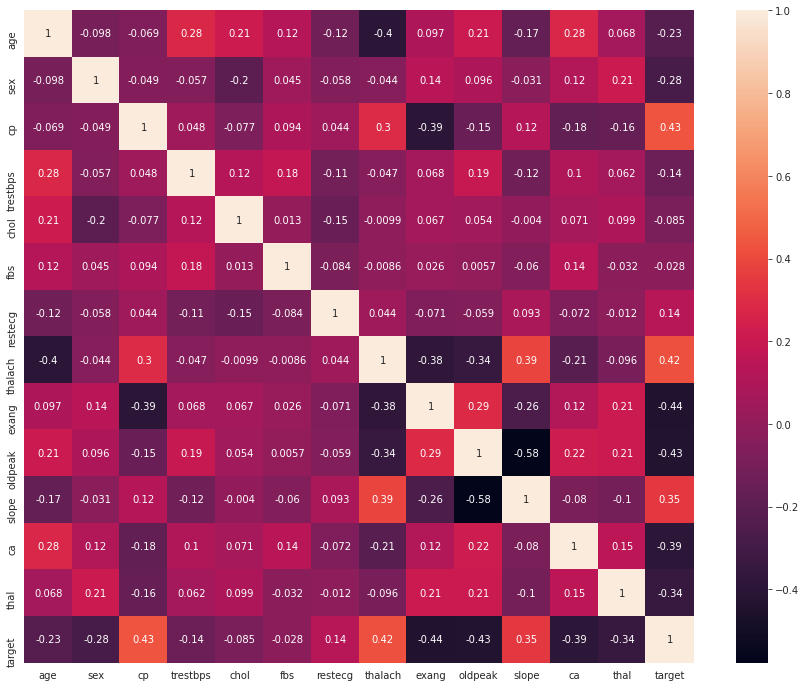

In [ ]:
plt.figure(figsize=(15,12))

sns.heatmap(heart.corr(),annot=True)

In [ ]:
#count no. of empty (NaN,na)values in each column
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

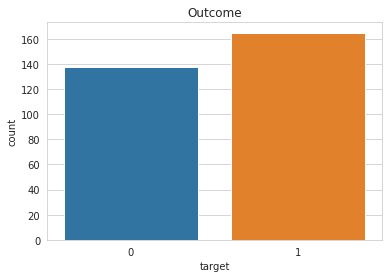

In [ ]:
sns.countplot(x=heart['target'])
plt.title('Outcome')
plt.show()

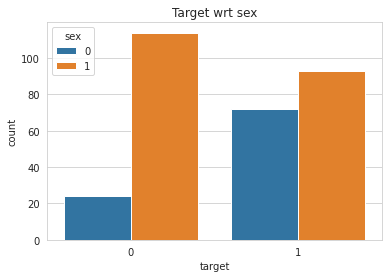

In [ ]:
sns.countplot(x=heart['target'],hue=heart['sex'])
plt.title('Target wrt sex')
plt.show()


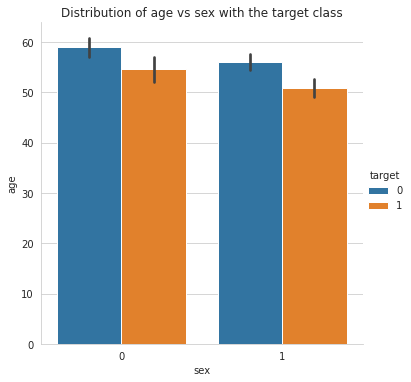

In [ ]:
sns.catplot(kind = 'bar', data = heart, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

Text(0.5, 1.0, 'target vs age(boxplot)')

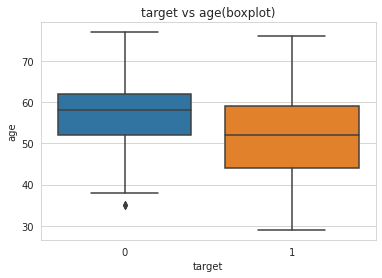

In [ ]:
sns.boxplot(x='target',y='age',data=heart)
plt.title('target vs age(boxplot)')

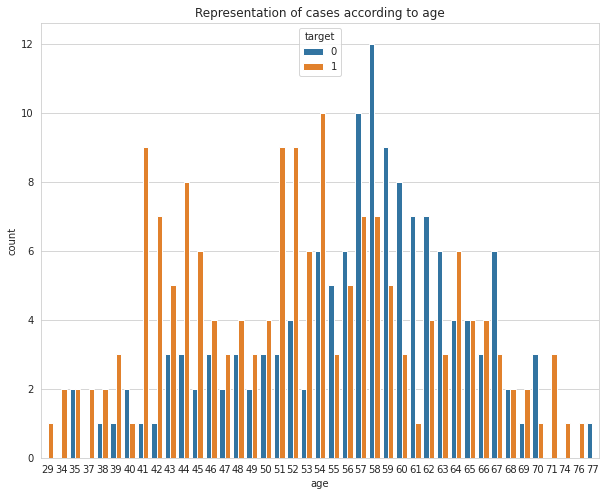

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=heart['age'],hue=heart['target'])
plt.title('Representation of cases according to age')
plt.show()

Text(0.5, 1.0, 'age vs chol (regression plot)')

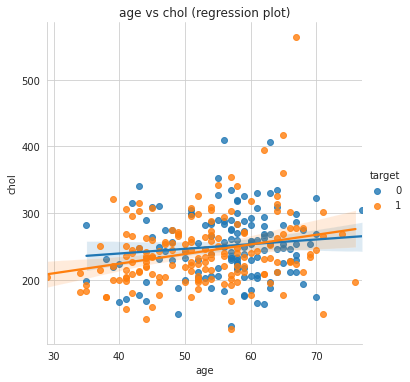

In [ ]:
sns.lmplot(x='age',y='chol',hue='target',data=heart)
plt.title('age vs chol (regression plot)')

Text(0.5, 1.0, 'age vs trestbps (regression plot)')

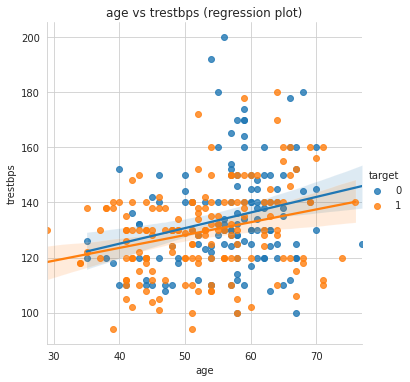

In [ ]:
sns.lmplot(x='age',y='trestbps',hue='target',data=heart)
plt.title('age vs trestbps (regression plot)')

Text(0.5, 1.0, 'trestbps according to age')

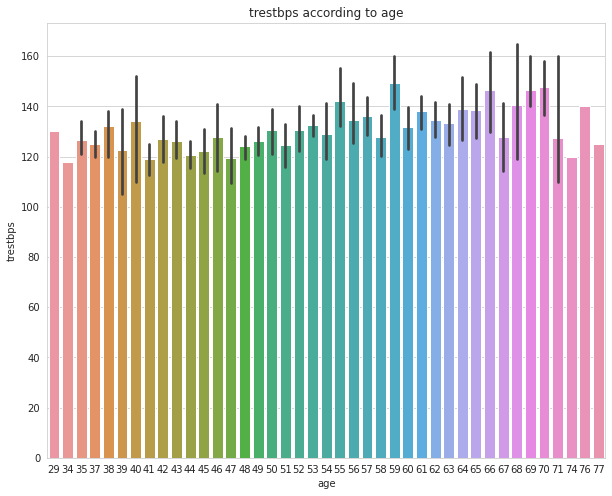

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='age',y='trestbps',data=heart)
plt.title('trestbps according to age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No. of people suffering from types of chest pain wrt Target')

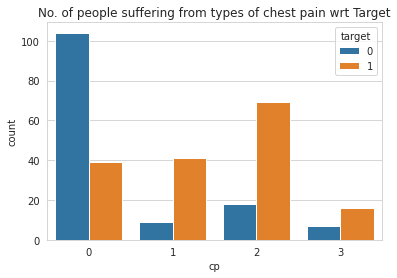

In [ ]:
sns.countplot(heart['cp'],hue=heart['target'])
plt.title('No. of people suffering from types of chest pain wrt Target')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No. of people suffering from types of ChestPain wrt Sex')

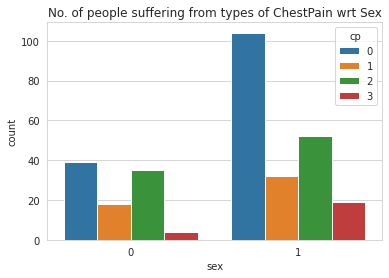

In [ ]:
sns.countplot(heart['sex'],hue=heart['cp'])
plt.title('No. of people suffering from types of ChestPain wrt Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of people of every age wrt to chestpain type')

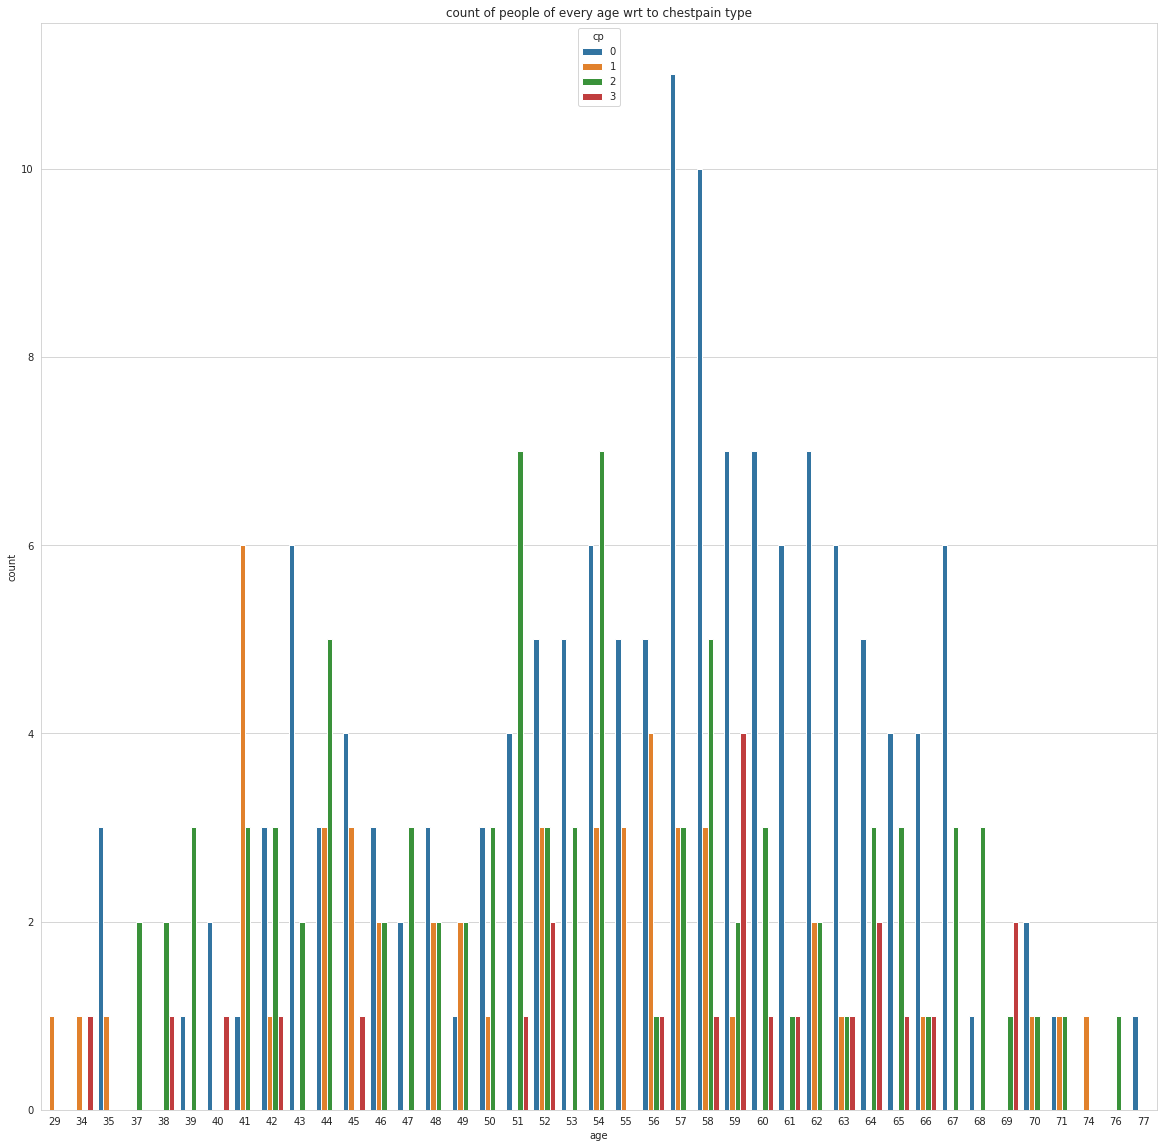

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(heart['age'],hue=heart['cp'])
plt.title('count of people of every age wrt to chestpain type')

Text(0.5, 1.0, 'count of people with type of FastingBloodSugar wrt target')

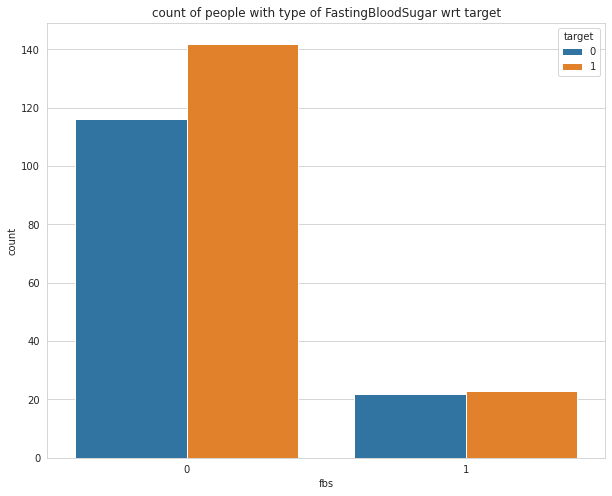

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=heart['fbs'],hue=heart['target'])
plt.title('count of people with type of FastingBloodSugar wrt target')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of people with type of restecg wrt to target')

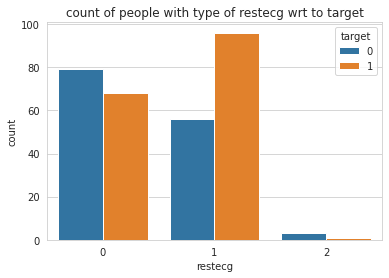

In [ ]:
sns.countplot(heart['restecg'],hue=heart['target'])
plt.title('count of people with type of restecg wrt to target')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of people with type of restecg wrt to sex')

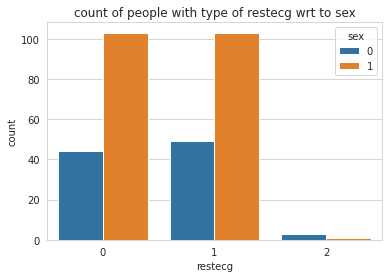

In [ ]:
sns.countplot(heart['restecg'],hue=heart['sex'])
plt.title('count of people with type of restecg wrt to sex')

Text(0.5, 1.0, 'restecg vs age wrt target')

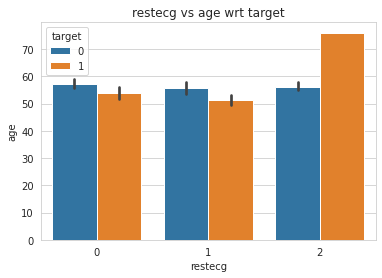

In [ ]:
sns.barplot(x='restecg',y='age',data=heart,hue='target')
plt.title('restecg vs age wrt target')

Text(0.5, 1.0, 'age vs thalach wrt sex')

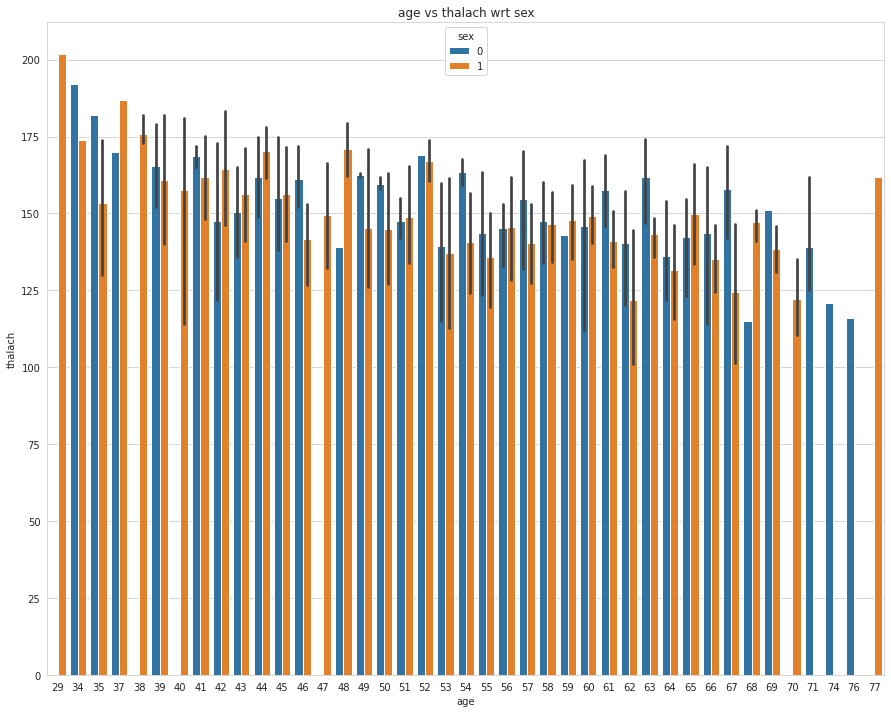

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x='age',y='thalach',hue='sex',data=heart)
plt.title('age vs thalach wrt sex')

Text(0.5, 1.0, 'age vs thalach wrt target')

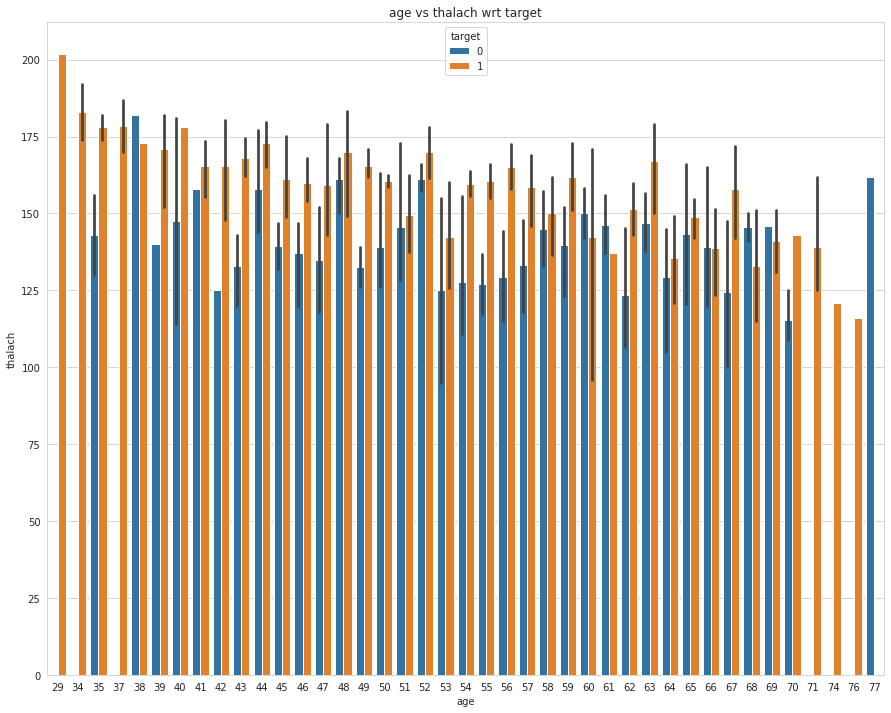

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x='age',y='thalach',hue='target',data=heart)
plt.title('age vs thalach wrt target')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of people with type of slope wrt target')

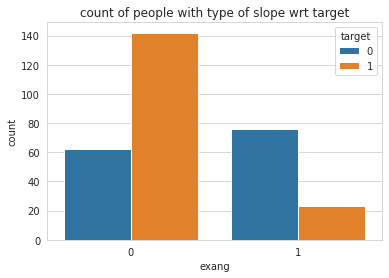

In [ ]:
sns.countplot(heart['exang'],hue=heart['target'])
plt.title('count of people with type of slope wrt target')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of people with type of slope wrt target')

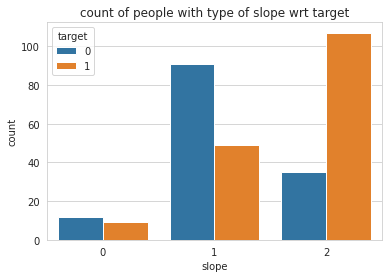

In [ ]:
sns.countplot(heart['slope'],hue=heart['target'])
plt.title('count of people with type of slope wrt target')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of people with no of vessels display during fluoroscopy wrt target')

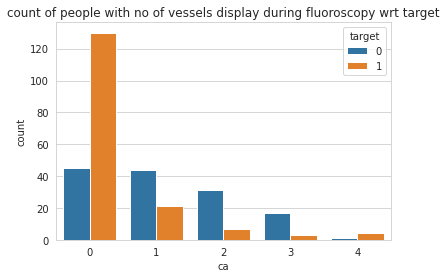

In [ ]:
sns.countplot(heart['ca'],hue=heart['target'])
plt.title('count of people with no of vessels display during fluoroscopy wrt target')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of people with no of vessels displayed during fluoroscopy wrt gender')

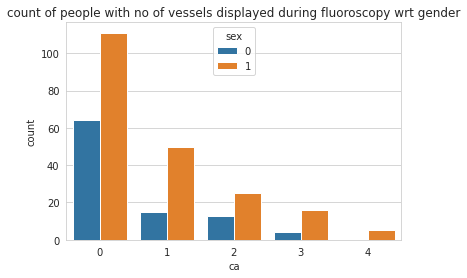

In [ ]:
sns.countplot(heart['ca'],hue=heart['sex'])
plt.title('count of people with no of vessels displayed during fluoroscopy wrt gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of people with type of thal wrt target')

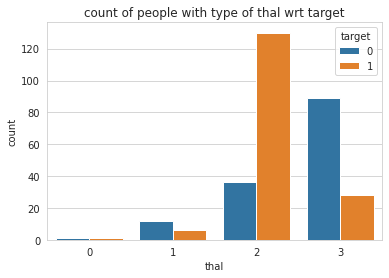

In [ ]:
sns.countplot(heart['thal'],hue=heart['target'])
plt.title('count of people with type of thal wrt target')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of people with type of thal wrt sex')

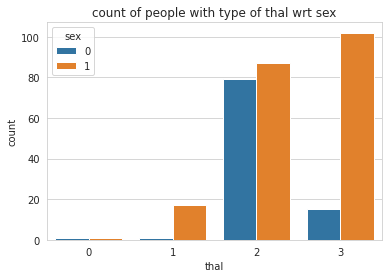

In [ ]:
sns.countplot(heart['thal'],hue=heart['sex'])
plt.title('count of people with type of thal wrt sex')

## TRAINING THE MODEL

In [ ]:
#Spliiting data into 70% training and 30% test set
from sklearn.model_selection import train_test_split

X=heart.drop("target",axis=1)
y=heart['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy report Random Forest - ",accuracy_score(y_test,rf.predict(X_test)))
print("Accuracy report Decision Tree - ",accuracy_score(y_test,dt.predict(X_test)))
print("Accuracy report XGBoost - ",accuracy_score(y_test,xgb.predict(X_test)))

Accuracy report Random Forest -  0.8241758241758241
Accuracy report Decision Tree -  0.8241758241758241
Accuracy report XGBoost -  0.8131868131868132


In [ ]:
from sklearn.metrics import classification_report
print("Classification report Random Forest - \n",classification_report(y_test,rf.predict(X_test)))
print("Classification report Decision Tree - \n",classification_report(y_test,dt.predict(X_test)))
print("Classification report XGBOOST - \n",classification_report(y_test,xgb.predict(X_test)))

Classification report Random Forest - 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.80      0.87      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Classification report Decision Tree - 
               precision    recall  f1-score   support

           0       0.94      0.68      0.79        44
           1       0.76      0.96      0.85        47

    accuracy                           0.82        91
   macro avg       0.85      0.82      0.82        91
weighted avg       0.85      0.82      0.82        91

Classification report XGBOOST - 
               precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg  

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix Random Forest - \n",confusion_matrix(y_test,rf.predict(X_test)))
print("Confusion Matrix Decision Tree - \n",confusion_matrix(y_test,dt.predict(X_test)))
print("Confusion Matrix XGBOOST - \n",confusion_matrix(y_test,xgb.predict(X_test)))


Confusion Matrix Random Forest - 
 [[34 10]
 [ 6 41]]
Confusion Matrix Decision Tree - 
 [[30 14]
 [ 2 45]]
Confusion Matrix XGBOOST - 
 [[33 11]
 [ 6 41]]


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

In [ ]:
#Support Vector Classifier
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_scaled,y_train)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train_scaled,y_train)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy report SVC - ",accuracy_score(y_test,svc.predict(X_test_scaled)))
print("Accuracy report Logistic Regression - ",accuracy_score(y_test,log.predict(X_test_scaled)))
print("Accuracy report KNN - ",accuracy_score(y_test,knn.predict(X_test_scaled)))

Accuracy report SVC -  0.8571428571428571
Accuracy report Logistic Regression -  0.8571428571428571
Accuracy report KNN -  0.8571428571428571


In [ ]:
from sklearn.metrics import classification_report

print("Accuracy report SVC - \n ",classification_report(y_test,svc.predict(X_test_scaled)))
print("Accuracy report Logistic Regression - \n ",classification_report(y_test,log.predict(X_test_scaled)))
print("Accuracy report KNN - \n ",classification_report(y_test,knn.predict(X_test_scaled)))

Accuracy report SVC - 
                precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.80      0.96      0.87        47

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.85        91
weighted avg       0.87      0.86      0.86        91

Accuracy report Logistic Regression - 
                precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.81      0.94      0.87        47

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.86        91
weighted avg       0.87      0.86      0.86        91

Accuracy report KNN - 
                precision    recall  f1-score   support

           0       0.86      0.84      0.85        44
           1       0.85      0.87      0.86        47

    accuracy                           0.86        91
   macro avg       0.86      0.86    

In [ ]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix SVC - \n ",confusion_matrix(y_test,svc.predict(X_test_scaled)))
print("Confusion Matrix Logistic Regression - \n ",confusion_matrix(y_test,log.predict(X_test_scaled)))
print("Confusion Matrix KNN - \n ",confusion_matrix(y_test,knn.predict(X_test_scaled)))

Confusion Matrix SVC - 
  [[33 11]
 [ 2 45]]
Confusion Matrix Logistic Regression - 
  [[34 10]
 [ 3 44]]
Confusion Matrix KNN - 
  [[37  7]
 [ 6 41]]


## Using GridSearch CV for HyperParameter Tuning of Support Vector Classifier

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.558, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.558, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.814, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.791, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.810, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.738, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.929, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.698, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.698, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print("best parameters:",grid.best_params_)
print("best estimaters:",grid.best_estimator_)

best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
best estimaters: SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
print(classification_report(y_test,grid.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        44
           1       0.82      0.96      0.88        47

    accuracy                           0.87        91
   macro avg       0.88      0.87      0.87        91
weighted avg       0.88      0.87      0.87        91



In [ ]:
print(accuracy_score(y_test,grid.predict(X_test_scaled)))

0.8681318681318682


In [ ]:
print(confusion_matrix(y_test,grid.predict(X_test_scaled)))

[[34 10]
 [ 2 45]]
